In [37]:
%matplotlib inline

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

# Exam Preparation

In [39]:
EPSILON = 1e-6

In [40]:
spaceship_data = pd.read_csv("data/train.csv", true_values=["True"], false_values=["False"])

In [41]:
spaceship_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [42]:
spaceship_data.shape

(8693, 14)

In [43]:
spaceship_data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [44]:
spaceship_data.CryoSleep.value_counts(dropna=False)

False    5439
True     3037
NaN       217
Name: CryoSleep, dtype: int64

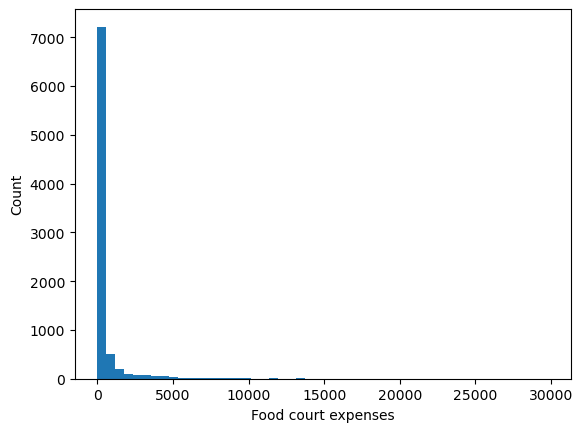

In [45]:
plt.hist(spaceship_data.FoodCourt, bins=50)
# plt.semilogx()
plt.xlabel("Food court expenses")
plt.ylabel("Count")
plt.show()

In [46]:
pd.qcut(spaceship_data.FoodCourt, q=20, duplicates = "drop").value_counts().sort_index()

(-0.001, 1.0]        5572
(1.0, 13.0]           395
(13.0, 76.0]          416
(76.0, 258.0]         426
(258.0, 608.0]        425
(608.0, 1026.0]       426
(1026.0, 2748.5]      424
(2748.5, 29813.0]     426
Name: FoodCourt, dtype: int64

In [47]:
spaceship_data[spaceship_data.FoodCourt == 0]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
12,0009_01,Mars,False,F/1/P,TRAPPIST-1e,32.0,False,73.0,0.0,1123.0,0.0,113.0,Berers Barne,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8681,9270_01,Earth,True,G/1497/S,55 Cancri e,33.0,False,0.0,0.0,0.0,0.0,0.0,Lan Mckinsond,True
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True
8685,9275_01,Europa,False,A/97/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Polaton Conable,True
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False


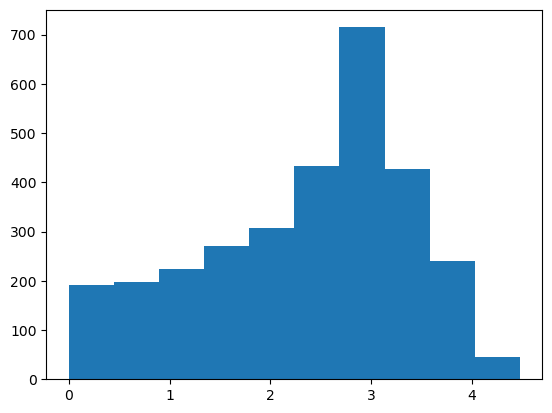

In [48]:
plt.hist(np.log10(spaceship_data.FoodCourt[spaceship_data.FoodCourt > 0]))
plt.show()

In [49]:
spaceship_data.loc[spaceship_data.FoodCourt <= 0, "FoodCourt"] = EPSILON

In [50]:
spaceship_data.FoodCourt = spaceship_data.FoodCourt.apply(lambda x: EPSILON if x <= 0 else x)

In [51]:
spaceship_data.FoodCourt.min()

1e-06

In [59]:
positive_values_transformer = FunctionTransformer(func=lambda x: np.array([EPSILON if elem <= 0 else elem for elem in x]))

In [60]:
positive_values_transformer.transform([1, 2, 3, 0, -5, -10])

array([1.e+00, 2.e+00, 3.e+00, 1.e-06, 1.e-06, 1.e-06])

In [61]:
log_transformer = FunctionTransformer(func=lambda x: np.log10(x))